In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

In [2]:
data = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
data.shape, test.shape

((10000, 20), (5000, 19))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [6]:
test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


### Разбивка данных train на train и valid

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train, valid = train_test_split(data, test_size=0.25, random_state=42)

In [10]:
train.shape, valid.shape

((7500, 20), (2500, 20))

### Корректировка данных

In [11]:
#Healthcare_1 полупустой, этот столбец будем удалять из всех данных

In [12]:
def drop_Healthcare_1 (df):
    df = df.drop('Healthcare_1', axis=1)
    return df

In [13]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,7500.000000,7500.000000,7500.000000,7500.000000,5906.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,3886.000000,7500.000000,7500.000000,7500.000000
mean,8368.529067,50.441733,1.887600,56.262165,37.438158,6.417333,8.502800,12.634400,4.658736e+03,0.117437,24.736133,5361.467467,8.027733,1129.527535,1.309467,4.259200,214000.951964
std,4858.185603,43.700617,0.840234,20.337193,98.726068,32.870226,5.236619,6.833644,2.315178e+05,0.118195,17.627507,4021.616228,23.825236,1015.975294,1.488576,4.819673,92539.924814
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4165.750000,19.000000,1.000000,41.748189,22.838608,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000,153980.839919
50%,8378.500000,35.000000,2.000000,52.539538,32.837997,6.000000,7.000000,14.000000,1.977000e+03,0.072158,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12540.250000,75.000000,2.000000,65.980391,45.069982,9.000000,12.000000,17.000000,2.001000e+03,0.194489,36.000000,7287.000000,5.000000,1547.750000,2.000000,6.000000,249035.045145
max,16796.000000,209.000000,19.000000,604.705972,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,627525.072788


In [14]:
#Есть ошибочные данные:
#Rooms = 0, Rooms = 19
# Square 2
#LifeSquare 0.3, 7480
#KitchenSquare 2014
#HouseFloor 0
#HouseYear 2.005201e+07

In [15]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,1981.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,1316.000000,2500.000000,2500.000000,2500.000000
mean,8428.043600,50.278000,1.899200,56.476606,36.488559,5.841200,8.598400,12.534400,1984.457600,0.123119,24.539600,5324.227200,8.073600,1182.405015,1.349600,4.147600,214552.573702
std,4862.217398,43.255209,0.837448,23.092063,23.528196,4.627542,5.255108,6.600715,18.558264,0.121407,17.247453,3962.685449,23.856518,1037.092439,1.508473,4.766099,93879.770542
min,2.000000,0.000000,0.000000,1.136859,1.404493,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59877.592523
25%,4186.500000,21.000000,1.000000,41.835804,22.667009,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153553.457623
50%,8447.000000,37.000000,2.000000,52.327762,32.608868,6.000000,8.000000,12.000000,1977.000000,0.075779,25.000000,5261.000000,2.000000,990.000000,1.000000,3.000000,192235.971755
75%,12762.500000,74.000000,2.000000,65.784656,45.421461,9.000000,12.000000,17.000000,2001.000000,0.200147,35.000000,7077.000000,5.000000,1554.750000,3.000000,5.000000,250658.986541
max,16798.000000,208.000000,10.000000,641.065193,638.163193,75.000000,37.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [16]:
#Есть ошибочные или "подозрительные" данные:
#Rooms = 0, Rooms = 10
# Square 1.1
#LifeSquare 1.4, 7480
#KitchenSquare 75
#HouseFloor 0

In [17]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [18]:
#Есть ошибочные или "подозрительные" данные:
#Rooms = 0, Rooms = 17
# Square 1.3
#LifeSquare 0.3, 303 (больше самой большой общей площади)
#KitchenSquare 620
#HouseFloor 0

HouseYear

In [19]:
train.loc[train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [20]:
train.loc[train['HouseYear'] == 4968, 'HouseYear'] = 1968
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = 2008
train.loc[train['HouseYear'] > 2020]

C:\Users\LMAXL\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


##Square, LifeSquare, Rooms correction

Square < LifeSquare swap

In [21]:
# функция исправления квартир с общей площадью меньше жилой

def sq_lifesq_swap (df):
    index_arr1 = df.loc[df['Square'] < df['LifeSquare']].index
    print(f'Корректируем Square < LifeSquare в квартирах c индексами:\n{index_arr1}')
    for index in index_arr1:
        df.loc[index, 'Square'], df.loc[index, 'LifeSquare'] = df.loc[index, 'LifeSquare'], df.loc[index, 'Square']
    return df, index_arr1

In [22]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# train.loc[train['LifeSquare'] > train['Square'], :].head(10)

In [23]:
train, i_tr_sq_lsq_swap = sq_lifesq_swap (train)

Корректируем Square < LifeSquare в квартирах c индексами:
Int64Index([8889, 6537, 4277, 9630, 7927, 2299, 8578, 5303, 2006, 3290,
            ...
            5600, 9492, 1734, 9721, 7408, 7035, 6863, 1016, 2734, 5734],
           dtype='int64', length=366)


In [24]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# train.loc[i_tr_sq_lsq_swap, :].head(10)

In [25]:
train.loc[train['LifeSquare'] > train['Square'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [26]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[valid['LifeSquare'] > valid['Square'], :].head(10)

In [27]:
valid, i_val_sq_lsq_swap = sq_lifesq_swap (valid)

Корректируем Square < LifeSquare в квартирах c индексами:
Int64Index([6363, 2750, 1963, 4625, 6077, 6843, 1123, 4202, 9335, 1509,
            ...
            6083, 2094, 6330, 7153, 8370, 2684, 7499, 5669, 3651, 9382],
           dtype='int64', length=116)


In [28]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_val_sq_lsq_swap, :].head(10)

In [29]:
valid.loc[valid['LifeSquare'] > valid['Square'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [30]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[test['LifeSquare'] > test['Square'], :].head(10)

In [31]:
test, i_tst_sq_lsq_swap = sq_lifesq_swap (test)

Корректируем Square < LifeSquare в квартирах c индексами:
Int64Index([   2,   27,   39,   43,   70,  102,  143,  206,  261,  272,
            ...
            4733, 4762, 4779, 4814, 4902, 4927, 4951, 4962, 4969, 4974],
           dtype='int64', length=241)


In [32]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_tst_sq_lsq_swap, :].head(10)

In [33]:
test.loc[test['LifeSquare'] > test['Square'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [34]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,7500.000000,7500.000000,7500.000000,7500.000000,5906.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,3886.000000,7500.000000,7500.000000,7500.000000
mean,8368.529067,50.441733,1.887600,57.393768,36.001141,6.417333,8.502800,12.634400,1985.002133,0.117437,24.736133,5361.467467,8.027733,1129.527535,1.309467,4.259200,214000.951964
std,4858.185603,43.700617,0.840234,88.230747,18.116876,32.870226,5.236619,6.833644,18.362037,0.118195,17.627507,4021.616228,23.825236,1015.975294,1.488576,4.819673,92539.924814
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4165.750000,19.000000,1.000000,41.845142,22.812178,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000,153980.839919
50%,8378.500000,35.000000,2.000000,52.659376,32.806190,6.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12540.250000,75.000000,2.000000,66.072953,45.016758,9.000000,12.000000,17.000000,2001.000000,0.194489,36.000000,7287.000000,5.000000,1547.750000,2.000000,6.000000,249035.045145
max,16796.000000,209.000000,19.000000,7480.592129,409.425181,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,627525.072788


In [35]:
#train ошибочные данные:
#Rooms = 0, Rooms = 19
# Square 2, 7480
#LifeSquare 0.3, 409
#KitchenSquare 2014
#HouseFloor 0

In [36]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,1981.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,1316.000000,2500.000000,2500.000000,2500.000000
mean,8428.043600,50.278000,1.899200,56.712630,36.190699,5.841200,8.598400,12.534400,1984.457600,0.123119,24.539600,5324.227200,8.073600,1182.405015,1.349600,4.147600,214552.573702
std,4862.217398,43.255209,0.837448,23.528450,22.711810,4.627542,5.255108,6.600715,18.558264,0.121407,17.247453,3962.685449,23.856518,1037.092439,1.508473,4.766099,93879.770542
min,2.000000,0.000000,0.000000,2.642219,1.136859,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59877.592523
25%,4186.500000,21.000000,1.000000,41.938839,22.652904,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,540.000000,0.000000,1.000000,153553.457623
50%,8447.000000,37.000000,2.000000,52.573407,32.552744,6.000000,8.000000,12.000000,1977.000000,0.075779,25.000000,5261.000000,2.000000,990.000000,1.000000,3.000000,192235.971755
75%,12762.500000,74.000000,2.000000,65.851264,45.106707,9.000000,12.000000,17.000000,2001.000000,0.200147,35.000000,7077.000000,5.000000,1554.750000,3.000000,5.000000,250658.986541
max,16798.000000,208.000000,10.000000,641.065193,638.163193,75.000000,37.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [37]:
#valid ошибочные или "подозрительные" данные:
#Rooms = 0, Rooms = 10
# Square 2.6, 641
#LifeSquare 1.1, 638
#KitchenSquare 75
#HouseFloor 0

In [38]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.591223,35.979822,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.407324,17.179153,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.989020,23.091332,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.933734,32.886142,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.416189,45.070420,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,303.071094,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [39]:
#test Есть ошибочные или "подозрительные" данные:
#Rooms = 0, Rooms = 17
# Square 1.3
#LifeSquare 0.3
#KitchenSquare 620
#HouseFloor 0



Rooms < 1 correction

In [40]:
train.loc[train['Rooms'] < 1, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [41]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[valid['Rooms'] < 1, :]

In [42]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[test['Rooms'] < 1, :]

In [43]:
# функция исправления квартир с 0 комнатами

def zero_rooms_corr (df):
    index_arr1 = df.loc[df['Rooms'] < 1.0, :].index
    print(f'Корректируем Rooms = 0 квартирах c индексами:\n{index_arr1}')
    for index in index_arr1:
        df.loc[index, 'Rooms'] = max((df.loc[index, 'Square'] / 25) // 1, 1)
    return df, index_arr1

In [44]:
# функция исправления квартир со слишком большим количеством комнат

def toomuch_rooms_corr (df):
    index_arr1 = df.loc[df['Rooms'] > 6.0, :].index
    print(f'Корректируем Rooms > 6 в квартирах c индексами:\n{index_arr1}')
    for index in index_arr1:
        df.loc[index, 'Rooms'] = (df.loc[index, 'Square'] / 25) // 1
    return df, index_arr1

In [45]:
# функция исправления квартир со слишком маленькой площадью

def square_corr (df):
    index_arr1 = df.loc[df['Square'] < df['Rooms'] * 15].index
    print(f'Корректируем Square < (Rooms * 15) в квартирах c индексами:\n{index_arr1}')
    for index in index_arr1:
        df.loc[index, 'Square'] = df.loc[index, 'Rooms'] * 15
    return df, index_arr1

In [46]:
# функция исправления квартир со слишком большой площадью

def square_corr_toomuch (df):
    index_arr1 = df.loc[(df['Square'] > 70)&(df['Rooms'] == 1), :].index
    print(f'Корректируем однокомнатные со Square > 70 в квартирах c индексами:\n{index_arr1}')
    for index in index_arr1:
        df.loc[index, 'Square'] = 70
    index_arr2 = df.loc[(df['Rooms'] * 50 < df['Square'])&(df['Rooms'] != 1), :].index
    print(f'Корректируем многокомнатные со Square > 50*колво комнат в квартирах c индексами:\n{index_arr1}')
    for index in index_arr2:
        df.loc[index, 'Square'] = df.loc[index, 'Rooms'] * 50    
    return df, index_arr1, index_arr2

In [47]:
# функция корректировки данных 1 (вызывает все перечисленные + удаление Healthcare_1)

def prepare_data1(df):
    df = drop_Healthcare_1 (df)
    df, index0rooms = zero_rooms_corr (df)
    df, index_toomuch_rooms = toomuch_rooms_corr (df)
    df, index_sq_corr = square_corr (df)
    df, index_sq_corr2, index_sq_corr3 = square_corr_toomuch (df)
    return df, index0rooms, index_toomuch_rooms, index_sq_corr, index_sq_corr2, index_sq_corr3

Данные для исправления во всех трех датасетах:

In [48]:
train.loc[train['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792


In [49]:
valid.loc[valid['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [50]:
test.loc[test['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [51]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# train.loc[train['Rooms'] * 15 > train['Square'], :]

In [52]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[valid['Rooms'] * 15 > valid['Square'], :]

In [53]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[test['Rooms'] * 15 > test['Square'], :]

In [54]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# train.loc[(train['Square'] > 70)&(train['Rooms'] == 1), :].head()

In [55]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# train.loc[(train['Rooms'] * 50 < train['Square'])&(train['Rooms'] != 1), :].head()

In [56]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[(valid['Square'] > 70)&(valid['Rooms'] == 1), :].head()

In [57]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[(valid['Rooms'] * 50 < valid['Square'])&(valid['Rooms'] != 1), :].head()

In [58]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[(test['Square'] > 70)&(test['Rooms'] == 1), :].head()

In [59]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[(test['Rooms'] * 50 < test['Square'])&(test['Rooms'] != 1), :].head()

In [60]:
#Исправляем train:

train, i_0rooms_tr, i_toomuch_rooms_tr, i_sq_corr_tr, i_sq_corr2_tr, i_sq_corr3_tr = prepare_data1(train)

Корректируем Rooms = 0 квартирах c индексами:
Int64Index([4366, 1397, 2269, 3911, 4853], dtype='int64')
Корректируем Rooms > 6 в квартирах c индексами:
Int64Index([1454, 377], dtype='int64')
Корректируем Square < (Rooms * 15) в квартирах c индексами:
Int64Index([6945, 3413, 5667, 2170, 4739, 3271, 2247, 9613, 1316, 4431, 4853,
            9294],
           dtype='int64')
Корректируем однокомнатные со Square > 70 в квартирах c индексами:
Int64Index([7976, 6094, 3260, 2881, 4525, 9589,  506, 1956, 5452, 4690, 7885,
            8274, 2194,  342,  610, 1641, 8390, 6579, 1804, 5658, 7906, 8949,
            3368,  638, 3974, 7339, 6019],
           dtype='int64')
Корректируем многокомнатные со Square > 50*колво комнат в квартирах c индексами:
Int64Index([7976, 6094, 3260, 2881, 4525, 9589,  506, 1956, 5452, 4690, 7885,
            8274, 2194,  342,  610, 1641, 8390, 6579, 1804, 5658, 7906, 8949,
            3368,  638, 3974, 7339, 6019],
           dtype='int64')


In [61]:
# Результаты исправления train - 0комнатные:

train.loc[i_0rooms_tr, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4366,456,6,3.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
1397,12638,27,5.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
2269,7317,27,1.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,1.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4853,3224,27,1.0,15.000000,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798


In [62]:
# Результаты исправления train - слишком многокомнатные:

train.loc[i_toomuch_rooms_tr, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792


In [63]:
# Результаты исправления train - слишком маленькая площадь:


train.loc[i_sq_corr_tr, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6945,12927,62,2.0,30.0,NaN,1.0,4,20.0,1977,0.072158,B,B,2,629,1,0,0,A,180750.471749
3413,9487,5,1.0,15.0,5.129222,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
5667,4352,104,2.0,30.0,15.565872,3.0,7,6.0,1931,0.000078,B,B,22,6398,141,3,23,B,197245.267664
2170,14003,99,6.0,90.0,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
4739,12676,81,3.0,45.0,13.784865,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
3271,6358,27,5.0,75.0,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,0,0,B,112693.641769
2247,16772,109,3.0,45.0,32.795221,6.0,2,9.0,1979,0.136330,B,B,30,6141,10,3,6,B,173602.708629
9613,7657,38,1.0,15.0,4.502784,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,483283.488083
1316,11526,27,1.0,15.0,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
4431,7594,53,5.0,75.0,39.394024,1.0,5,1.0,1977,0.049637,B,B,34,7759,0,1,3,B,206148.845716


In [64]:
# Результаты исправления train - 1 комнатные с большой площадью:

train.loc[i_sq_corr2_tr, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7976,1699,9,1.0,70.0,76.746654,1.0,8,7.0,1977,0.161532,B,B,25,5648,1,2,4,B,226206.962435
6094,9021,23,1.0,70.0,103.744170,1.0,26,25.0,1977,0.075779,B,B,6,1437,3,0,2,B,223249.331500
3260,16204,23,1.0,70.0,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452
2881,14662,23,1.0,70.0,NaN,1.0,1,2.0,1977,0.014073,B,B,2,475,0,0,0,B,160902.854650
4525,14773,30,1.0,70.0,87.387096,5.0,14,39.0,2010,0.000078,B,B,22,6398,141,3,23,B,476843.942405
9589,16638,38,1.0,70.0,106.260300,1.0,4,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,509162.416594
506,9552,23,1.0,70.0,105.432181,0.0,3,2.0,1977,0.014073,B,B,2,475,0,0,0,B,218718.046451
1956,15157,54,1.0,70.0,83.296167,17.0,26,37.0,2009,0.006076,B,B,30,5285,0,6,6,B,274139.065875
5452,11625,84,1.0,70.0,78.746443,19.0,26,36.0,2012,0.006076,B,B,30,5285,0,6,6,B,342223.033781
4690,2307,102,1.0,70.0,409.425181,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830


In [65]:
# Результаты исправления train - многокомнатные с большой площадью:

train.loc[i_sq_corr3_tr, :].head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
8131,4991,93,3.0,150.0,NaN,1.0,1,1.0,1977,0.004949,B,B,0,186,0,0,0,B,211180.794219
2603,5621,23,3.0,150.0,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663
9910,16568,27,4.0,200.0,200.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016
5350,5030,17,2.0,100.0,101.525114,1.0,20,1.0,1977,0.093443,B,B,23,4635,5,2,4,B,573999.459148
4262,28,9,2.0,100.0,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4328,16550,27,3.0,150.0,81.694417,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
6459,3302,30,2.0,100.0,86.460171,6.0,25,39.0,2009,0.000078,B,B,22,6398,141,3,23,B,193885.918114
652,3718,56,3.0,150.0,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979
907,9353,69,2.0,100.0,53.867589,14.0,12,12.0,2010,0.000991,B,B,33,6783,3,1,9,B,376318.769321
8437,15886,85,3.0,150.0,78.059331,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [66]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7500.000000,7500.000000,7500.000000,7500.000000,5906.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,8368.529067,50.441733,1.885600,56.123590,36.001141,6.417333,8.502800,12.634400,1985.002133,0.117437,24.736133,5361.467467,8.027733,1.309467,4.259200,214000.951964
std,4858.185603,43.700617,0.810967,18.471449,18.116876,32.870226,5.236619,6.833644,18.362037,0.118195,17.627507,4021.616228,23.825236,1.488576,4.819673,92539.924814
min,0.000000,0.000000,1.000000,15.000000,0.370619,0.000000,1.000000,0.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4165.750000,19.000000,1.000000,41.855199,22.812178,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153980.839919
50%,8378.500000,35.000000,2.000000,52.671446,32.806190,6.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12540.250000,75.000000,2.000000,66.088863,45.016758,9.000000,12.000000,17.000000,2001.000000,0.194489,36.000000,7287.000000,5.000000,2.000000,6.000000,249035.045145
max,16796.000000,209.000000,6.000000,200.000000,409.425181,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,627525.072788


In [67]:
#train ошибочные данные:
#LifeSquare 0.3, 409
#KitchenSquare 2014
#HouseFloor 0
#HouseYear 2.005201e+07

In [68]:
#Исправляем valid:

valid, i_0rooms_vl, i_toomuch_rooms_vl, i_sq_corr_vl, i_sq_corr2_vl, i_sq_corr3_vl = prepare_data1(valid)

Корректируем Rooms = 0 квартирах c индексами:
Int64Index([6149, 8834, 1981], dtype='int64')
Корректируем Rooms > 6 в квартирах c индексами:
Int64Index([8849, 1981], dtype='int64')
Корректируем Square < (Rooms * 15) в квартирах c индексами:
Int64Index([9001, 4900, 8283, 1608, 8148, 5617, 6392, 5155, 8551], dtype='int64')
Корректируем однокомнатные со Square > 70 в квартирах c индексами:
Int64Index([5653, 2688, 1175, 9813, 4047,  603, 8824, 4288, 3060, 6332, 6755,
            8979, 1918, 7028],
           dtype='int64')
Корректируем многокомнатные со Square > 50*колво комнат в квартирах c индексами:
Int64Index([5653, 2688, 1175, 9813, 4047,  603, 8824, 4288, 3060, 6332, 6755,
            8979, 1918, 7028],
           dtype='int64')


In [69]:
# Результаты исправления valid - 0комнатные:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_0rooms_vl, :]

In [70]:
# Результаты исправления valid - слишком многокомнатные:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_toomuch_rooms_vl, :]

In [71]:
# Результаты исправления valid - слишком маленькая площадь:

#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_sq_corr_vl, :]

In [72]:
# Результаты исправления valid - 1 комнатные с большой площадью:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_sq_corr2_vl, :]

In [73]:
# Результаты исправления valid - многокомнатные с большой площадью:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_sq_corr3_vl, :]

In [74]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,1981.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8428.043600,50.278000,1.900800,56.229722,36.190699,5.841200,8.598400,12.534400,1984.457600,0.123119,24.539600,5324.227200,8.073600,1.349600,4.147600,214552.573702
std,4862.217398,43.255209,0.828513,19.229044,22.711810,4.627542,5.255108,6.600715,18.558264,0.121407,17.247453,3962.685449,23.856518,1.508473,4.766099,93879.770542
min,2.000000,0.000000,1.000000,15.000000,1.136859,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59877.592523
25%,4186.500000,21.000000,1.000000,41.969292,22.652904,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,1.000000,153553.457623
50%,8447.000000,37.000000,2.000000,52.581282,32.552744,6.000000,8.000000,12.000000,1977.000000,0.075779,25.000000,5261.000000,2.000000,1.000000,3.000000,192235.971755
75%,12762.500000,74.000000,2.000000,65.851264,45.106707,9.000000,12.000000,17.000000,2001.000000,0.200147,35.000000,7077.000000,5.000000,3.000000,5.000000,250658.986541
max,16798.000000,208.000000,8.000000,250.000000,638.163193,75.000000,37.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [75]:
#valid ошибочные или "подозрительные" данные:
#LifeSquare 1.1, 638
#KitchenSquare 75
#HouseFloor 0

In [76]:
#Исправляем test:

test, i_0rooms_ts, i_toomuch_rooms_ts, i_sq_corr_ts, i_sq_corr2_ts, i_sq_corr3_ts = prepare_data1(test)

Корректируем Rooms = 0 квартирах c индексами:
Int64Index([2406, 2524], dtype='int64')
Корректируем Rooms > 6 в квартирах c индексами:
Int64Index([3398], dtype='int64')
Корректируем Square < (Rooms * 15) в квартирах c индексами:
Int64Index([66, 263, 599, 608, 837, 1165, 3697, 3912, 4490, 4540, 4902], dtype='int64')
Корректируем однокомнатные со Square > 70 в квартирах c индексами:
Int64Index([ 499,  528,  625,  830,  870,  916,  956,  963, 1082, 1240, 1335,
            1502, 1961, 2095, 2127, 2135, 2286, 2590, 2639, 2812, 2977, 2998,
            3249, 3734, 4231, 4384, 4673],
           dtype='int64')
Корректируем многокомнатные со Square > 50*колво комнат в квартирах c индексами:
Int64Index([ 499,  528,  625,  830,  870,  916,  956,  963, 1082, 1240, 1335,
            1502, 1961, 2095, 2127, 2135, 2286, 2590, 2639, 2812, 2977, 2998,
            3249, 3734, 4231, 4384, 4673],
           dtype='int64')


In [77]:
# Результаты исправления test - 0комнатные:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_0rooms_ts, :]

In [78]:
# Результаты исправления test - слишком многокомнатные:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_toomuch_rooms_ts, :]

In [79]:
# Результаты исправления test - слишком маленькая площадь:

#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_sq_corr_ts, :]

In [80]:
# Результаты исправления test - 1 комнатные с большой площадью:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_sq_corr2_ts, :].head(10)

In [81]:
# Результаты исправления test - многокомнатные с большой площадью:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_sq_corr3_ts, :]

In [82]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908400,56.405868,35.979822,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.810766,18.620484,17.179153,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,15.000000,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,42.004273,23.091332,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.957761,32.886142,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.428746,45.070420,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [83]:
#test ошибочные или "подозрительные" данные:
#LifeSquare 0.3
#KitchenSquare 620
#HouseFloor 0

Заполняем LifeSquare и корректируем слишком маленькие значения
(во всех датасетах на основе среднего соотношения из train)

In [84]:
meanSquare_to_LifeSquare = train['Square'].mean() / train['LifeSquare'].mean()
meanSquare_to_LifeSquare

1.558939227169149

In [85]:
# функция исправления LifeSquare

def lifesquare_corr (df):
    print(f'Заполняем пустые LifeSquare..')
    df['LifeSquare'] = df['LifeSquare'].fillna(df['Square'] / meanSquare_to_LifeSquare)
    print(f'Корректируем слишком маленькие LifeSquare..')
    df.loc[(df['LifeSquare'] < 10) & (df['Square'] / meanSquare_to_LifeSquare > df['LifeSquare']), 'LifeSquare'] = df['Square'] / meanSquare_to_LifeSquare
    print(f'Корректируем слишком большие LifeSquare..')
    df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square'] / meanSquare_to_LifeSquare

    return df

KitchenSquare

In [86]:
def kitchensquare_corr(df):
    index_arr3 = df.loc[(df['KitchenSquare'] > 32) & (df['Square'] / df['KitchenSquare'] < 4)].index
    print(f'Корректируем слишком большие KitchenSquare..')
    for i in index_arr3:
        df.loc[i, 'KitchenSquare'] = df.loc[i, 'Square'] / 5
    index_arr4 = df.loc[(df['KitchenSquare'] < 3) & (df['Square'] > 29), 'KitchenSquare'].index
    print(f'Корректируем слишком большие KitchenSquare..')    
    df.loc[(df['KitchenSquare'] < 3) & (df['Square'] > 29), 'KitchenSquare'] = df['Square'] / 5
    return df, index_arr3, index_arr4

Floor, Housefloor

In [87]:
def fl_hfl_corr(df):
    index_arr5 = df.loc[df['Floor'] > df['HouseFloor']].index
    print(f'Меняем этаж и этажность, где этаж больше этажности..')
    for i in index_arr5:
        df.loc[i, 'Floor'], df.loc[i, 'HouseFloor'] = df.loc[i, 'HouseFloor'], df.loc[i, 'Floor']
    print(f'Исправляем этаж = 0.')
    df.loc[(df['Floor'] == 0) & (df['HouseFloor'] == 1.0), 'Floor'] = 1.0
    df.loc[(df['Floor'] == 0), 'Floor'] = df['HouseFloor'] // 2
    return df, index_arr5

In [88]:
# функция корректировки данных 2 (вызывает 3 перечисленные)

def prepare_data2(df):
    df = lifesquare_corr (df)
    df, index_big_kitch, index_small_kitch = kitchensquare_corr(df)
    df, index_ch_fl = fl_hfl_corr(df)
    return df, index_big_kitch, index_small_kitch, index_ch_fl

In [89]:
#Исправляем train:

train, i_big_kitch_tr, i_sml_kitch_tr, i_ch_tr = prepare_data2(train)

Заполняем пустые LifeSquare..
Корректируем слишком маленькие LifeSquare..
Корректируем слишком большие LifeSquare..
Корректируем слишком большие KitchenSquare..
Корректируем слишком большие KitchenSquare..
Меняем этаж и этажность, где этаж больше этажности..
Исправляем этаж = 0.


In [90]:
train.loc[i_big_kitch_tr, :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1860,4265,161,2.0,53.216778,32.644859,10.643356,7.0,17.0,1994,0.000699,B,B,14,3369,24,0,3,B,261125.669724
551,1315,6,1.0,48.128114,45.023531,9.625623,1.0,21.0,2013,0.243205,B,B,5,1564,0,0,0,B,146950.912410
8584,14679,81,1.0,32.276663,19.278394,6.455333,1.0,6.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275
1867,3267,58,3.0,138.980817,138.004600,27.796163,2.0,2.0,1977,0.437885,B,B,23,5735,3,0,5,B,169528.896664
227,16395,2,3.0,79.722243,44.731219,15.944449,12.0,16.0,1987,0.130618,B,B,39,10418,9,1,9,B,370148.625285


In [91]:
train.loc[i_sml_kitch_tr, :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4901,13295,1,1.0,39.248800,25.176607,7.849760,9.0,17.0,1977,0.007122,B,B,1,264,0,0,1,B,114363.123431
9805,7238,9,2.0,63.640480,58.149243,12.728096,1.0,3.0,1977,0.161532,B,B,25,5648,1,2,4,B,183697.031896
9537,2253,1,3.0,89.397275,85.959266,17.879455,9.0,22.0,1977,0.007122,B,B,1,264,0,0,1,B,268268.043755
2638,9994,22,1.0,42.637786,27.350512,8.527557,9.0,17.0,1977,0.118537,B,B,30,6207,1,1,0,B,138718.922031
8665,12328,6,1.0,41.184949,26.418573,8.236990,4.0,17.0,1977,0.243205,B,B,5,1564,0,0,0,B,130455.641371


In [92]:
train.loc[i_ch_tr, :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
9805,7238,9,2.0,63.640480,58.149243,12.728096,1.0,3.0,1977,0.161532,B,B,25,5648,1,2,4,B,183697.031896
2903,6812,27,1.0,41.728985,26.767551,8.345797,5.0,11.0,1977,0.011654,B,B,4,915,0,0,0,B,112236.131647
8889,10005,58,1.0,47.483236,44.995130,9.496647,2.0,3.0,2019,0.437885,B,B,23,5735,3,0,5,B,106866.248746
3995,14970,9,2.0,62.622295,40.169812,12.524459,1.0,11.0,1977,0.161532,B,B,25,5648,1,2,4,B,186863.546381
87,16674,94,2.0,47.145626,30.738284,5.000000,9.0,11.0,1976,0.127376,B,B,43,8429,3,3,9,B,210364.314719


In [93]:
train.loc[train['Floor'] > train['HouseFloor'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [94]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,8368.529067,50.441733,1.885600,56.123590,36.980737,9.276473,7.782400,13.466133,1985.002133,0.117437,24.736133,5361.467467,8.027733,1.309467,4.259200,214000.951964
std,4858.185603,43.700617,0.810967,18.471449,15.328835,3.568179,5.205279,6.140359,18.362037,0.118195,17.627507,4021.616228,23.825236,1.488576,4.819673,92539.924814
min,0.000000,0.000000,1.000000,15.000000,9.621927,0.000000,1.000000,1.000000,1912.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4165.750000,19.000000,1.000000,41.855199,25.444332,7.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153980.839919
50%,8378.500000,35.000000,2.000000,52.671446,33.813135,8.824144,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12540.250000,75.000000,2.000000,66.088863,44.992976,10.981495,11.000000,17.000000,2001.000000,0.194489,36.000000,7287.000000,5.000000,2.000000,6.000000,249035.045145
max,16796.000000,209.000000,6.000000,200.000000,138.004600,32.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,627525.072788


In [95]:
# Dataframe train подготовлен

In [96]:
#Исправляем valid:

valid, i_big_kitch_vl, i_sml_kitch_vl, i_ch_vl = prepare_data2(valid)

Заполняем пустые LifeSquare..
Корректируем слишком маленькие LifeSquare..
Корректируем слишком большие LifeSquare..
Корректируем слишком большие KitchenSquare..
Корректируем слишком большие KitchenSquare..
Меняем этаж и этажность, где этаж больше этажности..
Исправляем этаж = 0.


In [97]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_big_kitch_vl, :].head()

In [98]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_sml_kitch_vl, :].head()

In [99]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[i_ch_vl, :].head()

In [100]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[valid['Floor'] > valid['HouseFloor'], :]

In [101]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,8428.043600,50.278000,1.900800,56.229722,37.037727,9.227240,7.913600,13.34440,1984.457600,0.123119,24.539600,5324.227200,8.073600,1.349600,4.147600,214552.573702
std,4862.217398,43.255209,0.828513,19.229044,16.055214,3.654314,5.183906,5.95308,18.558264,0.121407,17.247453,3962.685449,23.856518,1.508473,4.766099,93879.770542
min,2.000000,0.000000,1.000000,15.000000,9.621927,0.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59877.592523
25%,4186.500000,21.000000,1.000000,41.969292,25.465712,7.000000,4.000000,9.00000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,1.000000,153553.457623
50%,8447.000000,37.000000,2.000000,52.581282,33.625123,8.722638,7.000000,14.00000,1977.000000,0.075779,25.000000,5261.000000,2.000000,1.000000,3.000000,192235.971755
75%,12762.500000,74.000000,2.000000,65.851264,45.206761,10.528170,11.250000,17.00000,2001.000000,0.200147,35.000000,7077.000000,5.000000,3.000000,5.000000,250658.986541
max,16798.000000,208.000000,8.000000,250.000000,233.949309,42.586472,37.000000,48.00000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [102]:
# Dataframe valid подготовлен

In [103]:
#Исправляем test:

test, i_big_kitch_ts, i_sml_kitch_ts, i_ch_ts = prepare_data2(test)

Заполняем пустые LifeSquare..
Корректируем слишком маленькие LifeSquare..
Корректируем слишком большие LifeSquare..
Корректируем слишком большие KitchenSquare..
Корректируем слишком большие KitchenSquare..
Меняем этаж и этажность, где этаж больше этажности..
Исправляем этаж = 0.


In [104]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_big_kitch_ts, :].head()

In [105]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_sml_kitch_ts, :].head()

In [106]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[i_ch_ts, :].head()

In [107]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[test['Floor'] > test['HouseFloor'], :]

In [108]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908400,56.405868,37.213846,9.165610,7.954400,13.395000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.810766,18.620484,15.394927,3.549572,5.351864,6.231945,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,15.000000,9.621927,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,42.004273,25.507854,6.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.957761,34.071119,8.691178,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.428746,45.272404,10.608114,11.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,168.729035,33.980340,46.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [109]:
# Dataframe test подготовлен

In [110]:
train.to_csv('train_prep.csv')

In [111]:
valid.to_csv('valid_prep.csv')

In [112]:
test.to_csv('test_prep.csv')

Визуализация

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

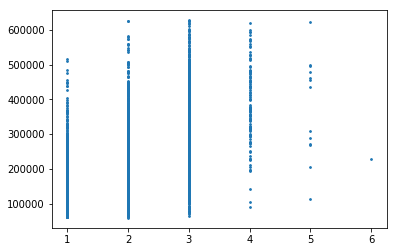

In [114]:
plt.scatter(train['Rooms'], train['Price'], s=3);

(array([ 196.,  475.,  841., 1225., 1410.,  968.,  691.,  393.,  314.,
         255.,  195.,  133.,  106.,   91.,   69.,   52.,   33.,   19.,
          21.,   13.]),
 array([ 59174.77802758,  87592.29276562, 116009.80750365, 144427.32224169,
        172844.83697972, 201262.35171775, 229679.86645579, 258097.38119382,
        286514.89593186, 314932.41066989, 343349.92540793, 371767.44014596,
        400184.954884  , 428602.46962203, 457019.98436007, 485437.4990981 ,
        513855.01383614, 542272.52857417, 570690.04331221, 599107.55805024,
        627525.07278827]),
 <a list of 20 Patch objects>)

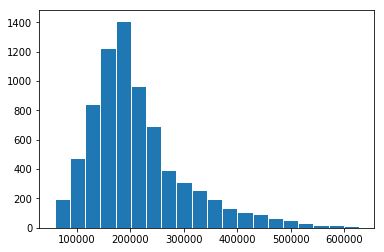

In [115]:
plt.hist(train['Price'], bins=20, ec='White')

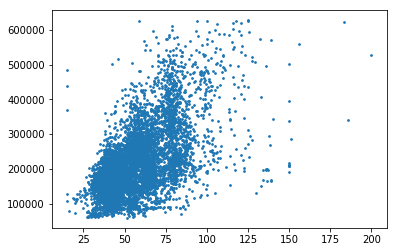

In [116]:
plt.scatter(train['Square'], train['Price'], s=3);

Приведение типов objects к числовым типам

In [117]:
train = pd.get_dummies(train)

In [118]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
4901,13295,1,1.0,39.248800,25.176607,7.849760,9.0,17.0,1977,0.007122,1,264,0,0,1,114363.123431,0,1,0,1,0,1
4375,3756,61,2.0,56.053580,33.929772,8.000000,8.0,12.0,1986,0.300323,52,10311,6,1,9,248648.729960,0,1,0,1,0,1
6698,15429,13,1.0,41.009788,23.960289,8.000000,3.0,14.0,1997,0.090799,74,19083,2,5,15,180347.854123,0,1,0,1,0,1
9805,7238,9,2.0,63.640480,58.149243,12.728096,1.0,3.0,1977,0.161532,25,5648,1,2,4,183697.031896,0,1,0,1,0,1
1101,13604,90,1.0,49.327912,20.992250,12.000000,15.0,23.0,2008,0.246032,22,3151,4,3,3,245768.096202,0,1,1,0,0,1


In [119]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [120]:
train.shape

(7500, 22)

In [121]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [122]:
valid = pd.get_dummies(valid)

In [123]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.head()

In [124]:
valid.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [125]:
valid.shape

(2500, 22)

In [126]:
valid.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Price            float64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

In [127]:
test = pd.get_dummies(test)

In [128]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.head()

In [129]:
test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B',
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [130]:
test.shape

(5000, 21)

In [131]:
test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
dtype: object

создание признака DiscountFloor (1,2, последний этажи в домах выше 1 этажа)

In [132]:
def discount_floor_add(df):
    df.loc[(df['HouseFloor'] > 1) & ((df['Floor'] == 1) | (df['Floor'] == 2) | (df['Floor'] == df['HouseFloor'])), 'discnt_flr'] = 1
    df['discnt_flr'].fillna(0, inplace=True)
    df['discnt_flr'] = df['discnt_flr'].astype(int)
    return df

In [133]:
train = discount_floor_add(train)

In [134]:
valid = discount_floor_add(valid)

In [135]:
test = discount_floor_add(test)

In [136]:
train.loc[train['discnt_flr'] == 1, :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,discnt_flr
9805,7238,9,2.0,63.640480,58.149243,12.728096,1.0,3.0,1977,0.161532,25,5648,1,2,4,183697.031896,0,1,0,1,0,1,1
7655,7846,79,2.0,42.090330,27.413836,5.000000,2.0,5.0,1964,0.169091,19,3856,10,2,5,206308.464366,0,1,0,1,0,1,1
2034,11125,8,1.0,36.288029,25.891884,5.000000,2.0,5.0,1962,0.437885,23,5735,3,0,5,136477.724311,0,1,0,1,0,1,1
2510,3132,129,1.0,34.606012,19.127897,6.000000,5.0,5.0,1959,0.051942,17,4017,7,2,0,186441.564211,0,1,0,1,0,1,1
3207,6061,61,3.0,57.541162,41.005769,5.000000,9.0,9.0,1976,0.300323,52,10311,6,1,9,241284.698700,0,1,0,1,0,1,1


In [137]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# valid.loc[valid['discnt_flr'] == 1, :].head()

In [138]:
#закомментировал вывод для удобочитаемости проекта и уменьшения "веса"
# test.loc[test['discnt_flr'] == 1, :].head()

In [139]:
train['discnt_flr'].describe()

count    7500.000000
mean        0.221200
std         0.415083
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: discnt_flr, dtype: float64

In [140]:
valid['discnt_flr'].describe()

count    2500.000000
mean        0.229200
std         0.420402
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: discnt_flr, dtype: float64

In [141]:
test['discnt_flr'].describe()

count    5000.0000
mean        0.2230
std         0.4163
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max         1.0000
Name: discnt_flr, dtype: float64

In [142]:
train['discnt_flr'].value_counts()

0    5841
1    1659
Name: discnt_flr, dtype: int64

In [143]:
valid['discnt_flr'].value_counts()

0    1927
1     573
Name: discnt_flr, dtype: int64

In [144]:
test['discnt_flr'].value_counts()

0    3885
1    1115
Name: discnt_flr, dtype: int64

Создание признака mean_sqm_prc_dstrct_roms (средняя цена квадратного метра по району)

In [145]:
train['sqm_price'] = train['Price'] / train['Square']

In [146]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,discnt_flr,sqm_price
4901,13295,1,1.0,39.248800,25.176607,7.849760,9.0,17.0,1977,0.007122,1,264,0,0,1,114363.123431,0,1,0,1,0,1,0,2913.799223
4375,3756,61,2.0,56.053580,33.929772,8.000000,8.0,12.0,1986,0.300323,52,10311,6,1,9,248648.729960,0,1,0,1,0,1,0,4435.911677
6698,15429,13,1.0,41.009788,23.960289,8.000000,3.0,14.0,1997,0.090799,74,19083,2,5,15,180347.854123,0,1,0,1,0,1,0,4397.678255
9805,7238,9,2.0,63.640480,58.149243,12.728096,1.0,3.0,1977,0.161532,25,5648,1,2,4,183697.031896,0,1,0,1,0,1,1,2886.480938
1101,13604,90,1.0,49.327912,20.992250,12.000000,15.0,23.0,2008,0.246032,22,3151,4,3,3,245768.096202,0,1,1,0,0,1,0,4982.333272


In [147]:
train['sqm_price'].describe()

count     7500.000000
mean      3898.503604
std       1338.689343
min        846.961137
25%       2916.293996
50%       3905.427448
75%       4696.383874
max      32218.899206
Name: sqm_price, dtype: float64

In [148]:
mean_sqm_price = train.groupby(['DistrictId', 'Rooms'], as_index=False)['sqm_price'].mean().rename(columns={'sqm_price': 'mean_sqm_prc_dstrct_roms'})
mean_sqm_price.head(10)

,DistrictId,Rooms,mean_sqm_prc_dstrct_roms
0,0,1.0,3522.209136
1,0,2.0,3705.589373
2,0,3.0,3741.587510
3,1,1.0,3351.985256
4,1,2.0,3142.505054
5,1,3.0,2961.271298
6,1,4.0,2775.876994
7,2,1.0,4755.538582
8,2,2.0,4523.467456
9,2,3.0,4658.250456


In [149]:
train = pd.merge(train, mean_sqm_price, on=['DistrictId', 'Rooms'], how='left')

In [150]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,discnt_flr,sqm_price,mean_sqm_prc_dstrct_roms
0,13295,1,1.0,39.248800,25.176607,7.849760,9.0,17.0,1977,0.007122,1,264,0,0,1,114363.123431,0,1,0,1,0,1,0,2913.799223,3351.985256
1,3756,61,2.0,56.053580,33.929772,8.000000,8.0,12.0,1986,0.300323,52,10311,6,1,9,248648.729960,0,1,0,1,0,1,0,4435.911677,4582.585753
2,15429,13,1.0,41.009788,23.960289,8.000000,3.0,14.0,1997,0.090799,74,19083,2,5,15,180347.854123,0,1,0,1,0,1,0,4397.678255,4573.692825
3,7238,9,2.0,63.640480,58.149243,12.728096,1.0,3.0,1977,0.161532,25,5648,1,2,4,183697.031896,0,1,0,1,0,1,1,2886.480938,3260.541515
4,13604,90,1.0,49.327912,20.992250,12.000000,15.0,23.0,2008,0.246032,22,3151,4,3,3,245768.096202,0,1,1,0,0,1,0,4982.333272,4574.333028


In [151]:
train['mean_sqm_prc_dstrct_roms'].describe()

count     7500.000000
mean      3898.503604
std       1018.481443
min       1016.753916
25%       2961.271298
50%       3977.045341
75%       4582.585753
max      11854.652892
Name: mean_sqm_prc_dstrct_roms, dtype: float64

In [152]:
valid = pd.merge(valid, mean_sqm_price, on=['DistrictId', 'Rooms'], how='left')

In [153]:
valid['mean_sqm_prc_dstrct_roms'].describe()

count    2452.000000
mean     3879.678828
std      1039.162320
min      1830.347126
25%      2933.951359
50%      3949.225424
75%      4573.692825
max      8959.281605
Name: mean_sqm_prc_dstrct_roms, dtype: float64

In [154]:
# для заполнения пропущенных значений

mean_fillna = mean_sqm_price['mean_sqm_prc_dstrct_roms'].mean()
mean_fillna

4616.944568146107

In [155]:
valid['mean_sqm_prc_dstrct_roms'] = valid['mean_sqm_prc_dstrct_roms'].fillna(mean_fillna)

In [156]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 24 columns):
Id                          2500 non-null int64
DistrictId                  2500 non-null int64
Rooms                       2500 non-null float64
Square                      2500 non-null float64
LifeSquare                  2500 non-null float64
KitchenSquare               2500 non-null float64
Floor                       2500 non-null float64
HouseFloor                  2500 non-null float64
HouseYear                   2500 non-null int64
Ecology_1                   2500 non-null float64
Social_1                    2500 non-null int64
Social_2                    2500 non-null int64
Social_3                    2500 non-null int64
Helthcare_2                 2500 non-null int64
Shops_1                     2500 non-null int64
Price                       2500 non-null float64
Ecology_2_A                 2500 non-null uint8
Ecology_2_B                 2500 non-null uint8
Ecology_3_A  

In [157]:
test = pd.merge(test, mean_sqm_price, on=['DistrictId', 'Rooms'], how='left')

In [158]:
test['mean_sqm_prc_dstrct_roms'].describe()

count    4908.000000
mean     3901.348988
std      1006.223690
min      1016.753916
25%      2981.331823
50%      3984.644038
75%      4591.351839
max      8959.281605
Name: mean_sqm_prc_dstrct_roms, dtype: float64

In [159]:
test['mean_sqm_prc_dstrct_roms'] = test['mean_sqm_prc_dstrct_roms'].fillna(mean_fillna)

In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Id                          5000 non-null int64
DistrictId                  5000 non-null int64
Rooms                       5000 non-null float64
Square                      5000 non-null float64
LifeSquare                  5000 non-null float64
KitchenSquare               5000 non-null float64
Floor                       5000 non-null float64
HouseFloor                  5000 non-null float64
HouseYear                   5000 non-null int64
Ecology_1                   5000 non-null float64
Social_1                    5000 non-null int64
Social_2                    5000 non-null int64
Social_3                    5000 non-null int64
Helthcare_2                 5000 non-null int64
Shops_1                     5000 non-null int64
Ecology_2_A                 5000 non-null uint8
Ecology_2_B                 5000 non-null uint8
Ecology_3_A                 5000 non-null uint8
Ecology_3_B    

In [161]:
train.shape, valid.shape

((7500, 25), (2500, 24))

LINEAR REGRESSION

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
lr = LinearRegression()

In [164]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'discnt_flr', 'sqm_price', 'mean_sqm_prc_dstrct_roms'],
      dtype='object')

In [165]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
         'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B',
         'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'discnt_flr', 'mean_sqm_prc_dstrct_roms'
        ]

In [166]:
len(feats)

22

In [167]:
lr.fit(train.loc[:, feats], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predict on train and valid

In [168]:
pred_train = lr.predict(train.loc[:, feats])

In [169]:
pred_train

array([124629.08629065, 248810.70445389, 198361.67702763, ...,
       261810.71980406, 211823.09210895, 357312.81856551])

In [170]:
pred_train.shape

(7500,)

In [171]:
pred_valid = lr.predict(valid.loc[:, feats])

In [172]:
pred_valid.shape

(2500,)

Evaluate lr

In [173]:
from sklearn.metrics import r2_score as r2

In [174]:
r2(train['Price'], pred_train)

0.7204356252487364

In [175]:
r2(valid['Price'], pred_valid)

0.5978983850987545

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
scaler = StandardScaler()

In [178]:
train_scaled = scaler.fit_transform(train.loc[:, feats])

C:\Users\LMAXL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LMAXL\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [179]:
train_scaled = pd.DataFrame(train_scaled, columns=train.loc[:, feats].columns)

In [180]:
train_scaled.shape

(7500, 22)

In [181]:
valid_scaled = scaler.transform(valid.loc[:, feats])

C:\Users\LMAXL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [182]:
valid_scaled = pd.DataFrame(valid_scaled, columns=valid.loc[:, feats].columns)

In [183]:
lr.fit(train_scaled, train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Признак')

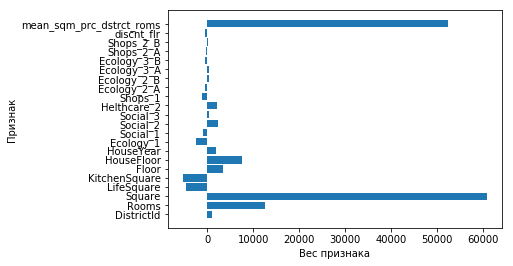

In [184]:
plt.barh(train.loc[:, feats].columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [185]:
feats = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
         'Social_2', 'Helthcare_2', 'Shops_1', 'discnt_flr', 'mean_sqm_prc_dstrct_roms']

In [186]:
from sklearn.metrics import mean_squared_error

In [187]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats], y_train)
    y_pred=model.predict(X_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    r2m = r2(y_test, y_pred)
    return mse, r2m

In [188]:
create_model(train_scaled, train['Price'], valid_scaled, valid['Price'], feats, LinearRegression())

(3552612269.117792, 0.5967470761476696)

In [189]:
from sklearn.linear_model import Lasso, Ridge

In [190]:
# Параметр alpha отвечает за регуляризацию
model = Lasso(alpha=85)

In [191]:
create_model(train_scaled, train['Price'], valid_scaled, valid['Price'], feats, model)

(3551916256.8468437, 0.5968260796983067)

In [192]:
# Параметр alpha отвечает за регуляризацию
model = Ridge(alpha=900)

In [193]:
create_model(train_scaled, train['Price'], valid_scaled, valid['Price'], feats, model)

(3502073779.0717473, 0.6024836419010753)

Random Forest

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
parameters = [{'n_estimators': [150, 200, 250], 
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(8, 11)}]

In [197]:
rgr = GridSearchCV(estimator=RandomForestRegressor(random_state=100), 
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [198]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
         'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B',
         'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B', 'discnt_flr', 'mean_sqm_prc_dstrct_roms'
        ]

In [199]:
rgr.fit(train.loc[:, feats], train['Price'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [150, 200, 250], 'max_features': array([5, 6, 7, 8]), 'max_depth': array([ 8,  9, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [200]:
rgr.best_params_

{'max_depth': 10, 'max_features': 8, 'n_estimators': 250}

In [201]:
y_pred = rgr.predict(valid.loc[:, feats])
r2(valid['Price'], y_pred)

0.7144460257286621

Predict on test

In [202]:
test['Price'] = rgr.predict(test.loc[:, feats])

In [203]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,discnt_flr,mean_sqm_prc_dstrct_roms,Price
0,725,58,2.0,49.882643,33.432782,6.000000,6.0,14.0,1972,0.310199,11,2748,1,0,0,0,1,0,1,0,1,0,2877.132709,159155.542405
1,15856,74,2.0,69.263183,44.429688,13.852637,1.0,6.0,1977,0.075779,6,1437,3,0,2,0,1,0,1,0,1,1,3306.553724,224916.750035
2,5480,190,1.0,15.948246,13.597819,12.000000,2.0,5.0,1909,0.000000,30,7538,87,5,5,0,1,0,1,0,1,1,4616.944568,173286.336055
3,15664,47,2.0,73.046609,51.940842,9.000000,22.0,22.0,2007,0.101872,23,4583,3,3,3,0,1,0,1,0,1,1,3726.454041,286446.088427
4,14275,27,1.0,47.527111,43.387569,9.505422,17.0,17.0,2017,0.072158,2,629,1,0,0,0,1,0,1,1,0,1,2921.041880,136428.919070


In [204]:
test.loc[:, ['Id', 'Price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null int64
Price    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 117.2 KB


In [205]:
test.loc[:, ['Id', 'Price']].to_csv('MLukyanov_predictions.csv', index=None)